In [ ]:
#Para acessar as imagens do Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Carregar uma imagem do dataset (ajuste o caminho conforme sua estrutura)
img_path = '/content/drive/MyDrive/UFC/TCC/dataset_odonto_ufc/Dataset_Mask_Copia_Com_Itens_Excluidos_UFC/101_22A_M.jpg'
image = cv2.imread(img_path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [ ]:

# Sobel
sobelx = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)
sobel = cv2.convertScaleAbs(sobel)
sobel = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX)
sobel = sobel.astype(np.uint8)
sobel = cv2.convertScaleAbs(sobel, alpha=1.5, beta=10)

# Prewitt
kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
prewittx = cv2.filter2D(image_gray, -1, kernelx)
prewitty = cv2.filter2D(image_gray, -1, kernely)
prewitt = cv2.addWeighted(prewittx, 0.5, prewitty, 0.5, 0)
prewitt = cv2.convertScaleAbs(prewitt, alpha=4.5, beta=30)

# Roberts
robertsx = cv2.filter2D(image_gray, -1, np.array([[1, 0], [0, -1]]))
robertsy = cv2.filter2D(image_gray, -1, np.array([[0, 1], [-1, 0]]))
roberts = cv2.addWeighted(robertsx, 0.5, robertsy, 0.5, 0)
roberts = cv2.convertScaleAbs(roberts, alpha=12, beta=70)

# Laplaciano
laplacian = cv2.Laplacian(image_gray, cv2.CV_64F)
laplacian = np.abs(laplacian)
laplacian = cv2.convertScaleAbs(laplacian, alpha=12, beta=65)

# Top-Hat e Black-Hat
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15,15))
tophat = cv2.morphologyEx(image_gray, cv2.MORPH_TOPHAT, kernel)
tophat = cv2.normalize(tophat, None, 0, 255, cv2.NORM_MINMAX)
tophat = tophat.astype(np.uint8)
tophat = cv2.convertScaleAbs(tophat, alpha=2.5, beta=20)

blackhat = cv2.morphologyEx(image_gray, cv2.MORPH_BLACKHAT, kernel)
blackhat = cv2.normalize(blackhat, None, 0, 255, cv2.NORM_MINMAX)
blackhat = blackhat.astype(np.uint8)
blackhat = cv2.convertScaleAbs(blackhat, alpha=2.5, beta=20)


# Gamma Correction
gamma = 2.0  # ou 2.0
inv_gamma = 1.0 / gamma
table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
gamma_corr = cv2.LUT(image_gray, table)


# Original
original = image_gray


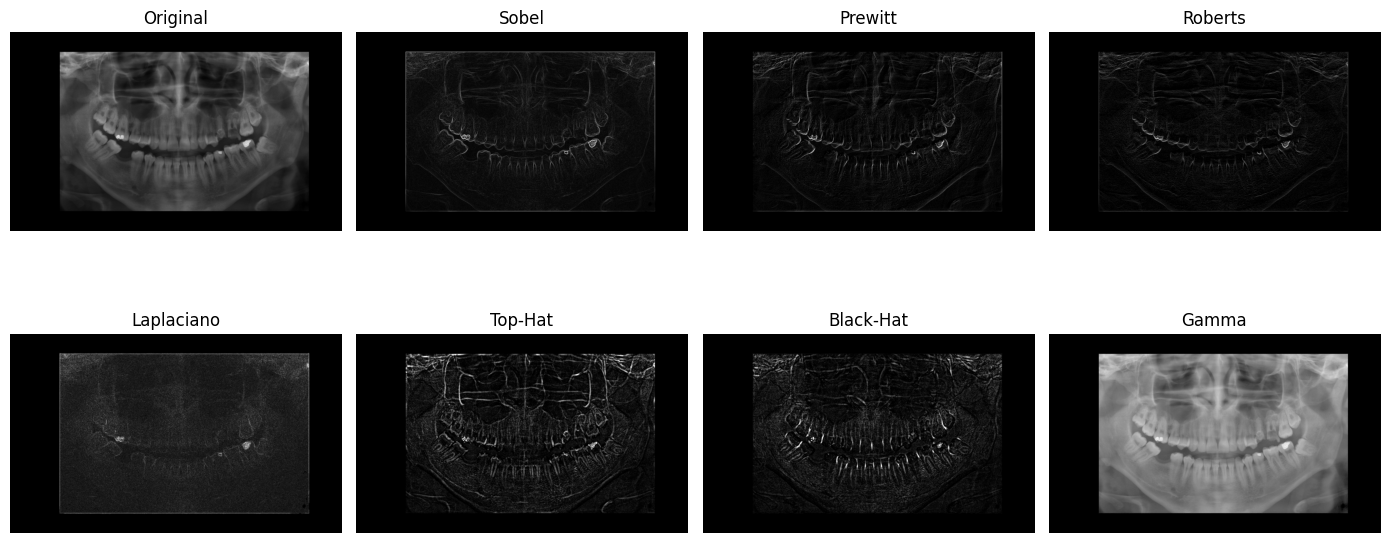

In [ ]:
# Títulos e imagens
titles = ['Original', 'Sobel', 'Prewitt', 'Roberts',
          'Laplaciano', 'Top-Hat', 'Black-Hat', 'Gamma']
images = [original, sobel, prewitt, roberts,
          laplacian, tophat, blackhat, gamma_corr]

# Plotar 4x2
plt.figure(figsize=(14, 7))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.savefig('figura_grid_filtros.png', dpi=300, bbox_inches='tight')
plt.show()